Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

Missing Values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Statistical Summary:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935

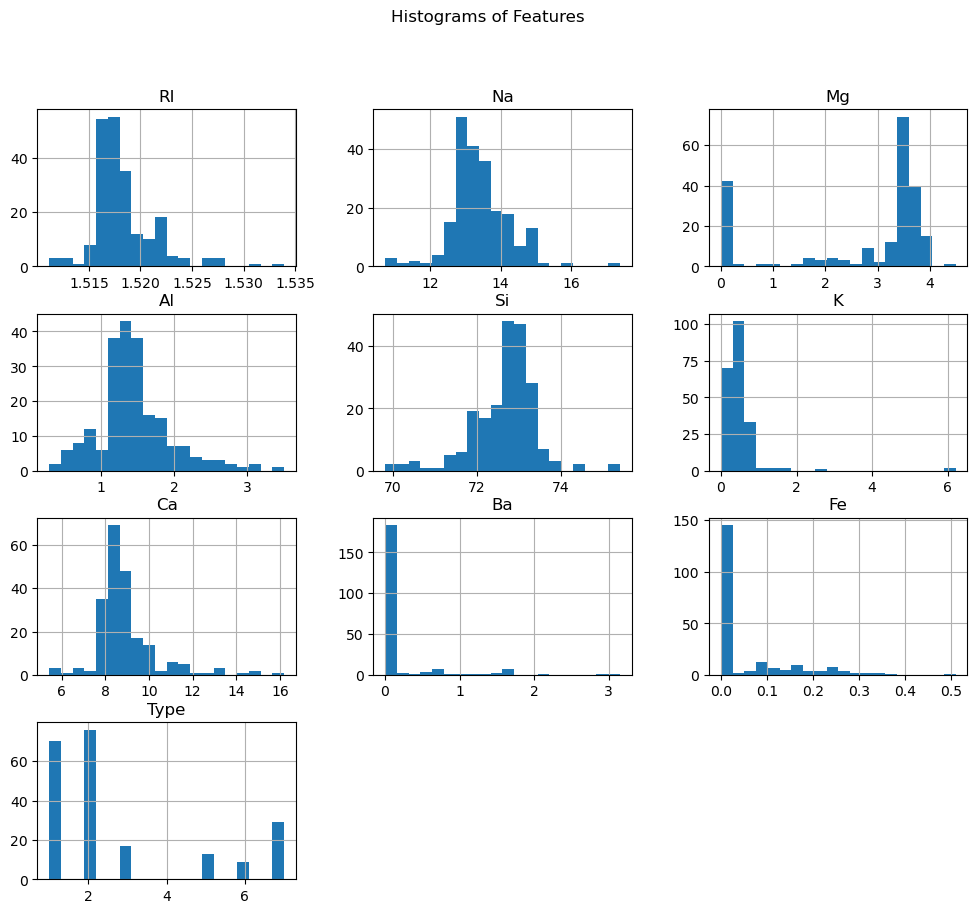

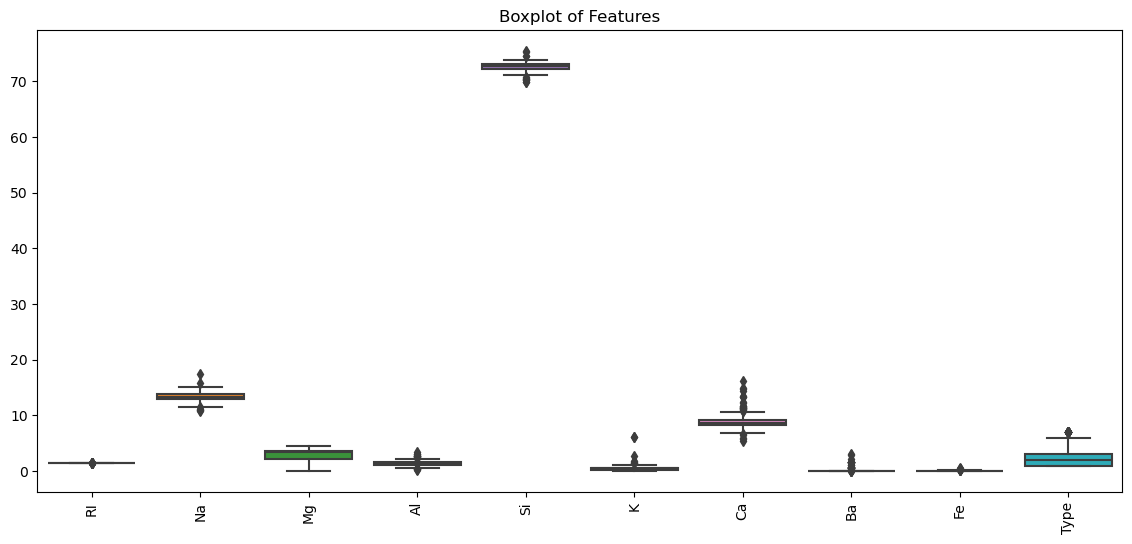

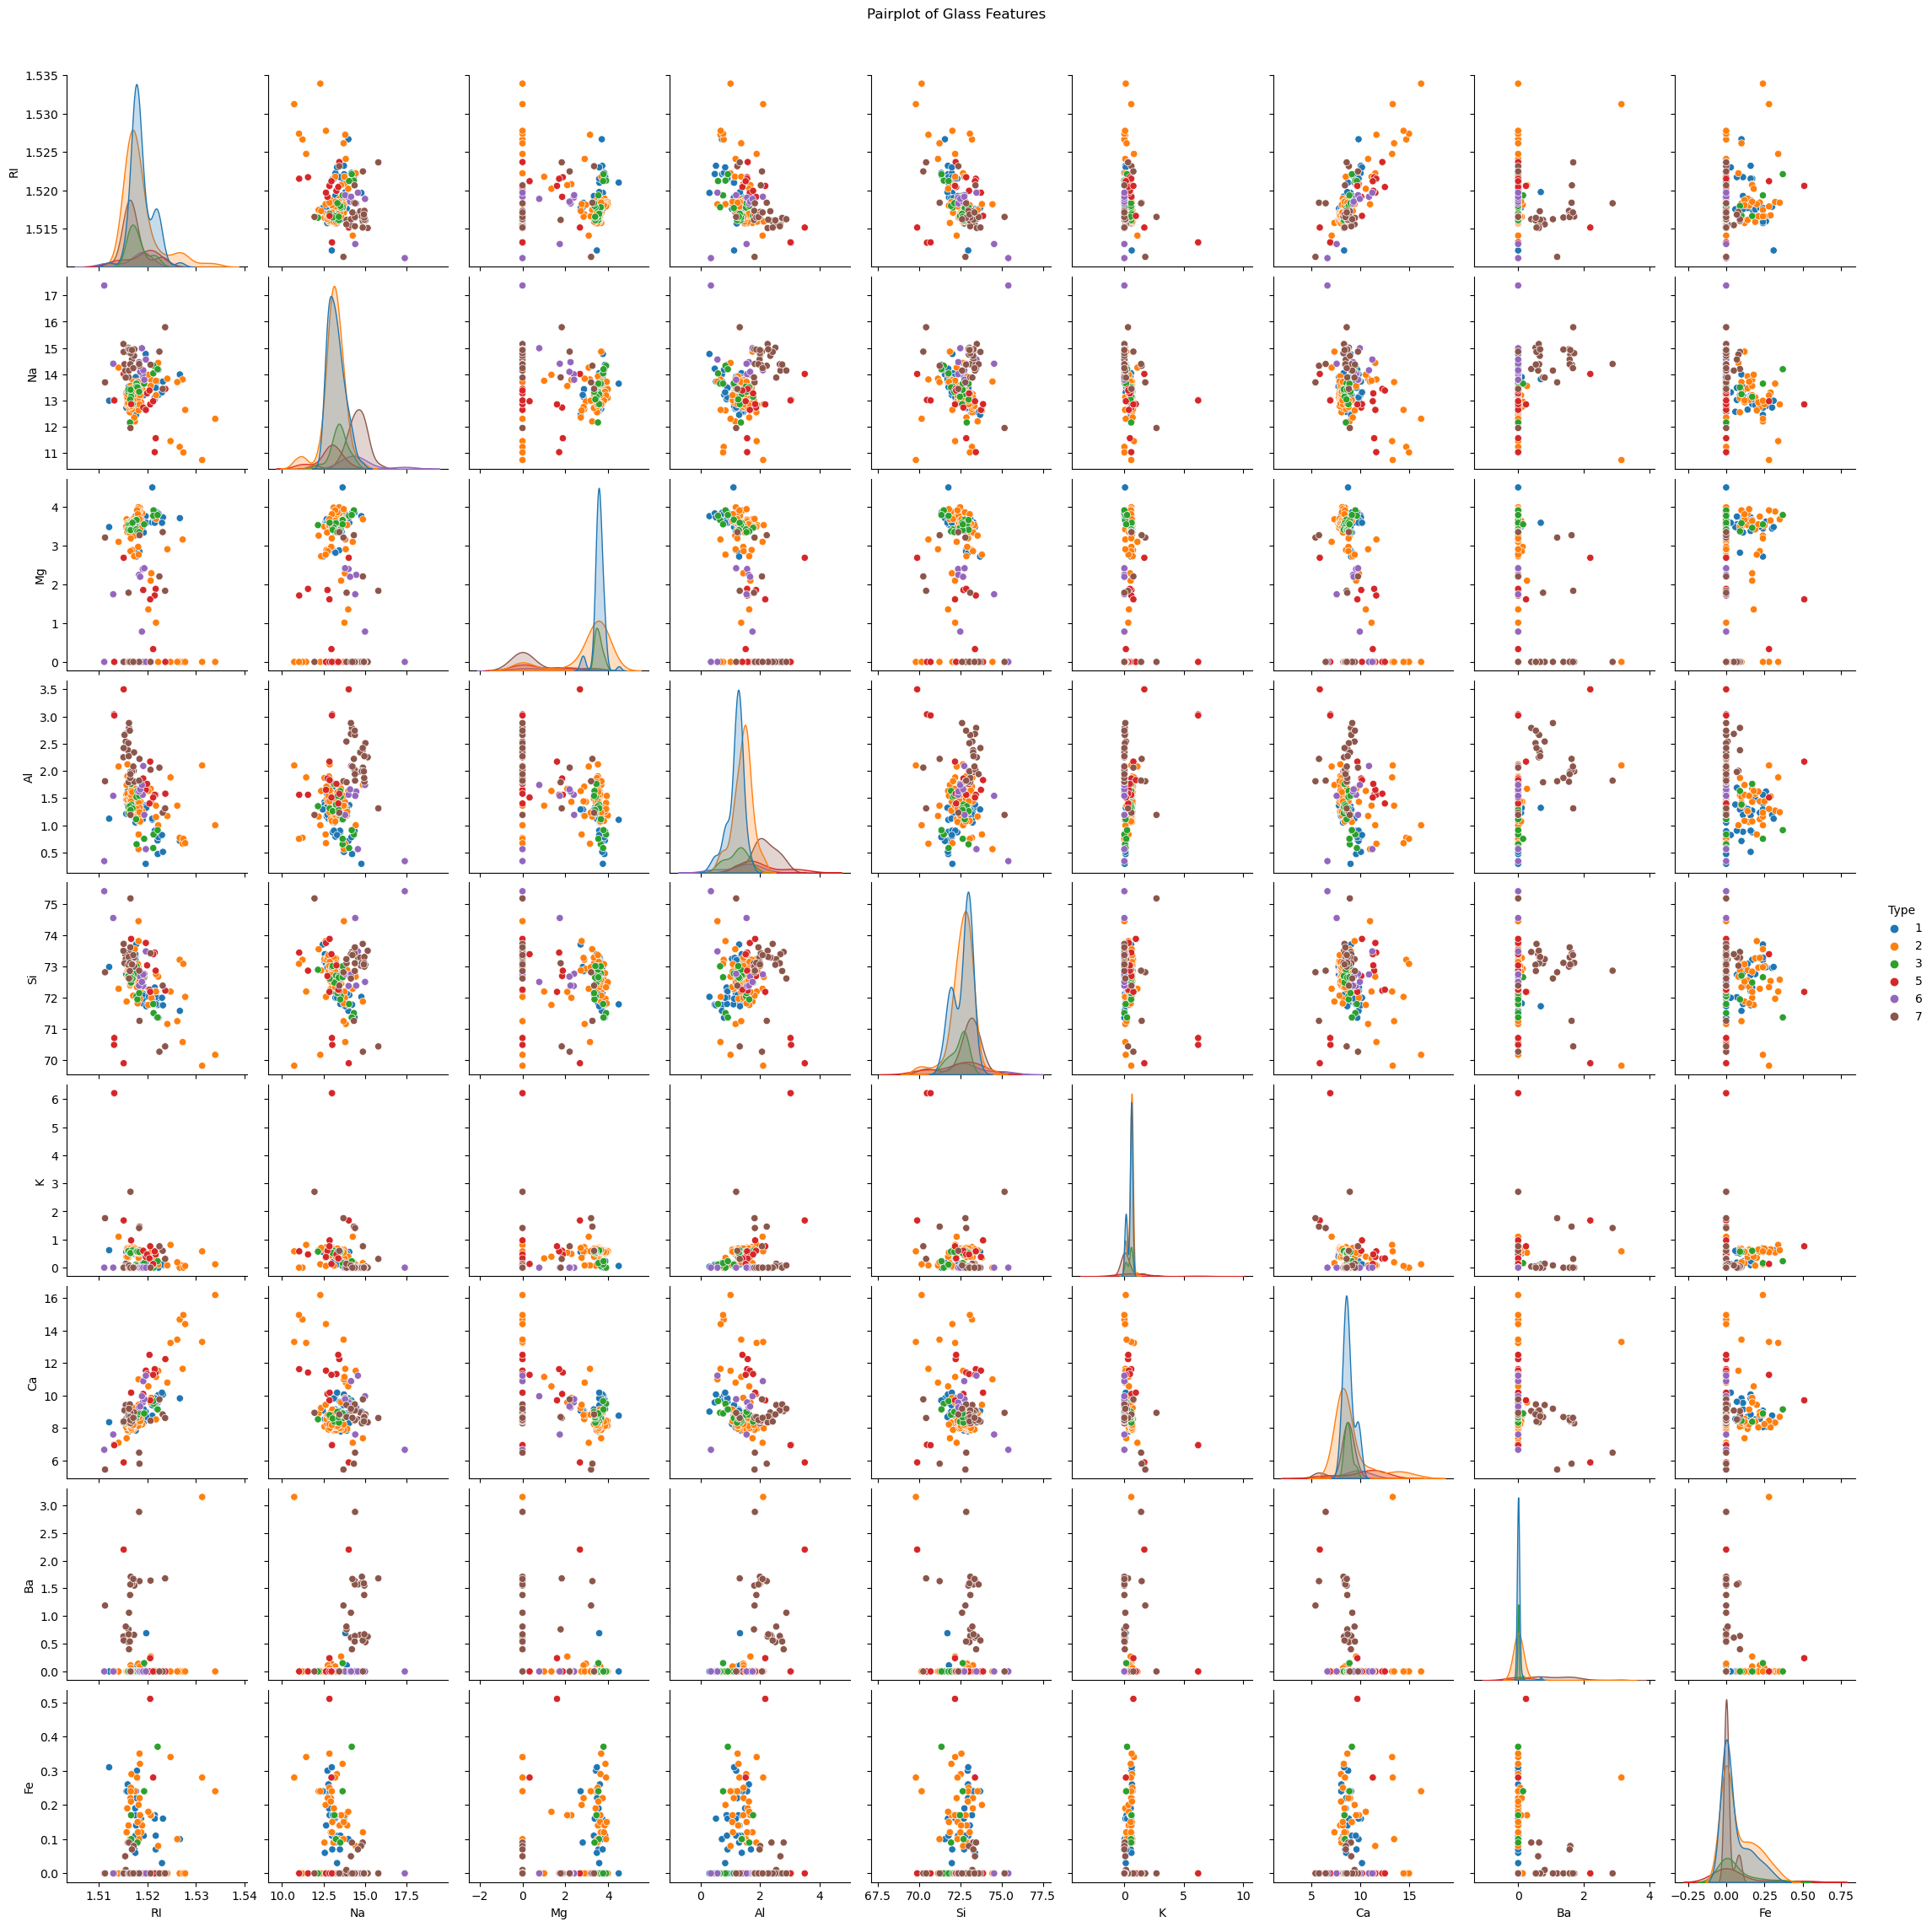

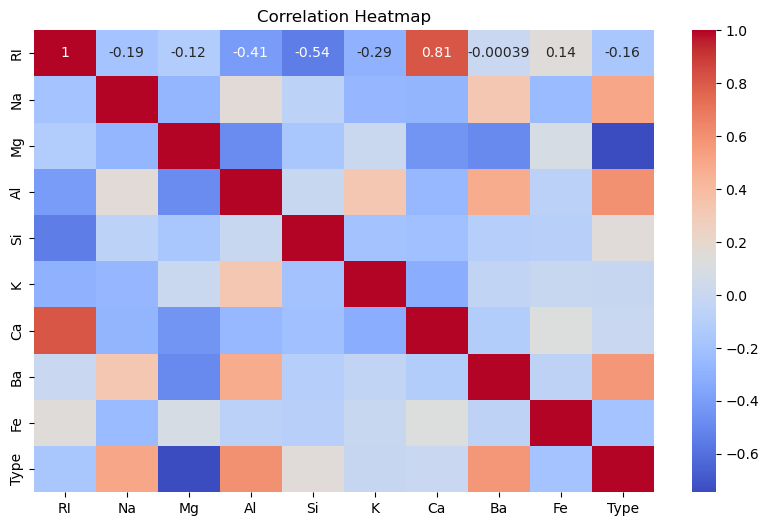


Random Forest
Accuracy: 0.8307692307692308
              precision    recall  f1-score   support

           1       0.80      0.95      0.87        21
           2       0.86      0.78      0.82        23
           3       1.00      0.40      0.57         5
           5       0.60      0.75      0.67         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.83        65
   macro avg       0.83      0.80      0.79        65
weighted avg       0.85      0.83      0.83        65


Bagging (Random Forest Base)
Accuracy: 0.7846153846153846
              precision    recall  f1-score   support

           1       0.77      0.95      0.85        21
           2       0.77      0.74      0.76        23
           3       1.00      0.40      0.57         5
           5       0.33      0.25      0.29         4
           6       0.75      1.00      0.86         3
           7       1.00      

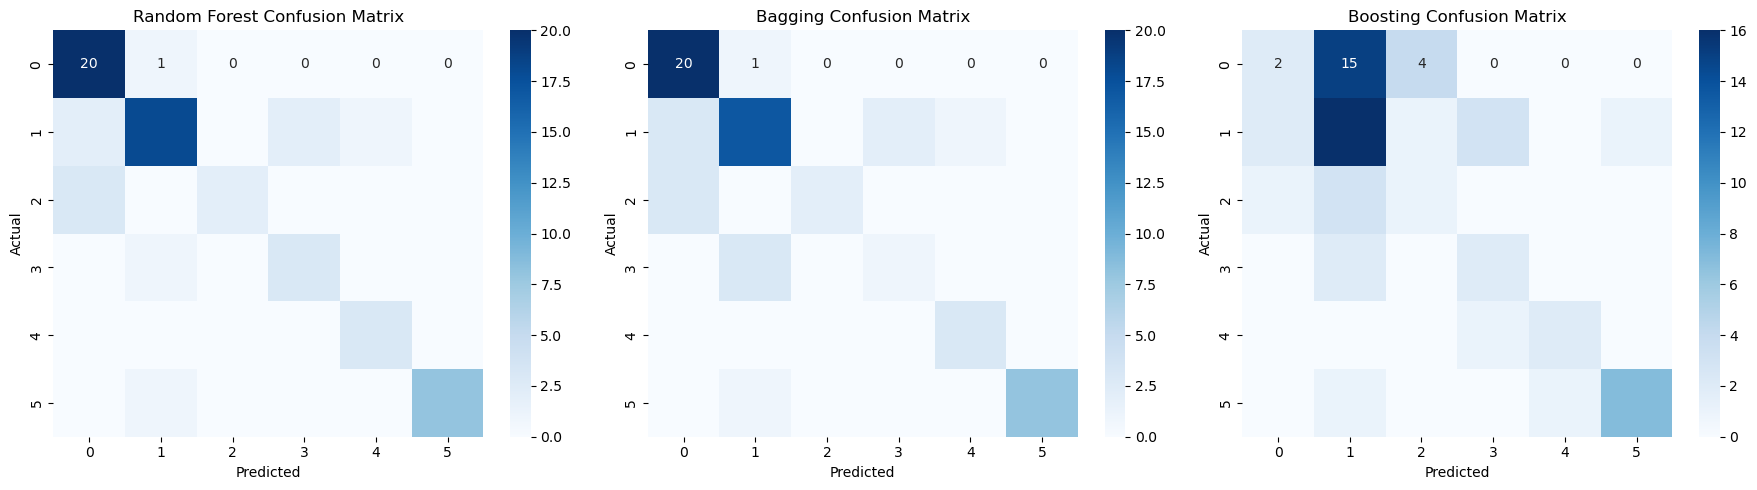

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_excel("glass.xlsx", sheet_name="glass")  # Or use CSV if needed

# EDA 
print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

#  Visualizations 
# Histograms
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Features")
plt.show()

# Boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=90)
plt.show()

# Pairplot by Type
sns.pairplot(df, hue="Type", palette="tab10")
plt.suptitle("Pairplot of Glass Features", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing 
X = df.drop(columns='Type')
y = df['Type']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Random Forest 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Bagging 
bag = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print("\nBagging (Random Forest Base)")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

# Boosting 
boost = AdaBoostClassifier(n_estimators=50, random_state=42)
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)

print("\nBoosting (AdaBoost)")
print("Accuracy:", accuracy_score(y_test, y_pred_boost))
print(classification_report(y_test, y_pred_boost))

# Confusion Matrices 
plt.figure(figsize=(18, 5))
for idx, (title, preds) in enumerate([
    ("Random Forest", y_pred_rf),
    ("Bagging", y_pred_bag),
    ("Boosting", y_pred_boost)
]):
    plt.subplot(1, 3, idx + 1)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()
